# Context 

Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs. [IBM Sample Data Sets (kaggle)](https://www.kaggle.com/datasets/blastchar/telco-customer-churn).

# Load Libararies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# Load Data 

In [3]:
from pathlib import Path

In [4]:
current_dir = Path('.').resolve()

In [5]:
file_path = current_dir / 'data/04-Telco Customer Churn.csv'

In [6]:
df = pd.read_csv(file_path)

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Preparation

## Column Names

In [8]:
df.columns = df.columns.str.lower()

## Categorical Features

In [9]:
categorical_columns = df.dtypes[df.dtypes == 'object'].index

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [10]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


`senirocitizen` is a binary value. `totalcharges` is an object (text) and need to change to a number.

In [12]:
tc = pd.to_numeric(df['totalcharges'], errors='coerce') # If 'coerce', then invalid parsing will be set as NaN.

In [13]:
df[['customerid', 'totalcharges']][tc.isnull()]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [14]:
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')

In [15]:
df['totalcharges'] = df['totalcharges'].fillna(0)

## Dependent Variable

In [16]:
df['churn']

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In machine learning, we are not interested in yes/no, we are interested in the numbers.

In [17]:
df['churn'] = (df['churn'] == 'yes').astype(int)

# Setting Up the Validation Framework

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [20]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [21]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

It is not a must but you can rest the index of the new data frames.

In [22]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [23]:
y_train = df_train['churn'].values
y_val = df_val['churn'].values
y_test = df_test['churn'].values

In [24]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

# Exploratory Data Anlysis

For **exploratory data analysis**, we will use the **full training dataset**.

In [25]:
df_full_train = df_full_train.reset_index(drop=True)

In [26]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [27]:
df_full_train['churn'].value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [28]:
df_full_train['churn'].value_counts(normalize=True) # Return proportions rather than frequencies

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [29]:
# calculate the churn rate
global_churn = df_full_train['churn'].mean()
round(global_churn, 2)

0.27

In [30]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

Here we are interested in the `seniorcitizen`, `monthlycharges`, and `totalcharges`.

In [31]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [32]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

## One-Hot Encoding

Encode categorical features as a one-hot numeric array.

In [33]:
from sklearn.feature_extraction import DictVectorizer

In [34]:
dv = DictVectorizer(sparse=False)

In [35]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [36]:
X_train = dv.fit_transform(train_dict)

# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model = LogisticRegression()

In [39]:
model.fit(X_train, y_train)

/home/siamak/anaconda3/envs/mlops/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')

In [41]:
X_val = dv.transform(val_dict)

In [42]:
y_pred = model.predict_proba(X_val)[:, 1]

In [43]:
churn_decision = (y_pred > 0.5)

In [44]:
(y_val == churn_decision).mean()

0.8034066713981547

# Performance Measure

## Accuracy

In [45]:
len(y_val)

1409

In [46]:
(y_val == churn_decision).sum()

1132

In [47]:
1132 / 1409

0.8034066713981547

In [48]:
(y_val == churn_decision).mean()

0.8034066713981547

Is 80% good or not?

In [49]:
thresholds = np.linspace(0, 1, 21)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [50]:
scores = []

for t in thresholds:
    churn_decision = (y_pred > t)
    score = (y_val == churn_decision).mean()
    print(f'{t:.2f} => {score:.3f}')
    scores.append(score)

0.00 => 0.274
0.05 => 0.509
0.10 => 0.591
0.15 => 0.667
0.20 => 0.710
0.25 => 0.739
0.30 => 0.760
0.35 => 0.772
0.40 => 0.785
0.45 => 0.793
0.50 => 0.803
0.55 => 0.801
0.60 => 0.795
0.65 => 0.786
0.70 => 0.765
0.75 => 0.744
0.80 => 0.735
0.85 => 0.726
0.90 => 0.726
0.95 => 0.726
1.00 => 0.726


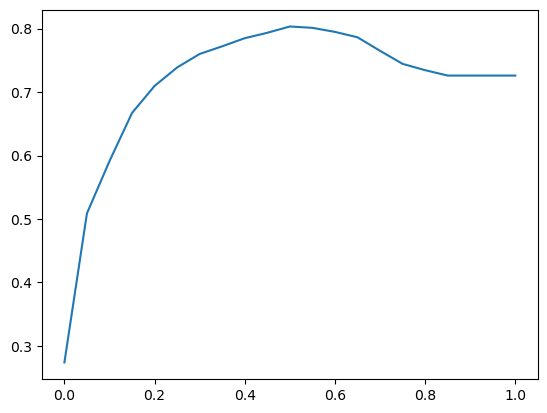

In [51]:
plt.plot(thresholds, scores)
plt.show()

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy_score(y_val, y_pred >= 0.5)

0.8034066713981547

In [54]:
scores = []

for t in thresholds:
    churn_decision = (y_pred > t)
    score = accuracy_score(y_val, (y_pred > t))
    print(f'{t:.2f} => {score:.3f}')
    scores.append(score)

0.00 => 0.274
0.05 => 0.509
0.10 => 0.591
0.15 => 0.667
0.20 => 0.710
0.25 => 0.739
0.30 => 0.760
0.35 => 0.772
0.40 => 0.785
0.45 => 0.793
0.50 => 0.803
0.55 => 0.801
0.60 => 0.795
0.65 => 0.786
0.70 => 0.765
0.75 => 0.744
0.80 => 0.735
0.85 => 0.726
0.90 => 0.726
0.95 => 0.726
1.00 => 0.726


The **first** and **last** points on the curve is **interesting** for us. Threshold 1, techinically means that every customer is treated as non-churning. It means that relax, all is going to be good, nobody is going to churn. Let's not send any promotional email to anyone.

In [55]:
from collections import Counter

In [56]:
Counter(y_pred >= 1)

Counter({False: 1409})

In [57]:
Counter(y_val)

Counter({0: 1023, 1: 386})

In [58]:
# chruning rate
y_val.mean()

0.2739531582682754

In [59]:
1 - y_val.mean()

0.7260468417317246

If we say that all the customers will not churn, the prediction accuracy is around 73% and our logistic regression model has an accuracy of 80%. So, accuracy is not a good measure of performance because we have class imbalance. That is why accuracy for class imbalance cases is misleading, so we need to use other metrics.

## Confusion Matrix

In [60]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [61]:
actual_negative

array([ True,  True,  True, ...,  True, False, False])

In [62]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred <  t)

In [63]:
predict_negative

array([ True,  True,  True, ...,  True, False, False])

In [64]:
# True Positive
tp = (predict_positive & actual_positive).sum()

In [65]:
# True Negative
tn = (predict_negative & actual_negative).sum()

In [66]:
tp, tn

(210, 922)

In [67]:
# False Positive
fp = (predict_positive & actual_negative).sum()

In [68]:
# False Negative
fn = (predict_negative & actual_positive).sum()

In [69]:
fp, fn

(101, 176)

In [70]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[922, 101],
       [176, 210]])

In [71]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

## Precision and Recall

Precision: Fraction of positive predictions that are correct.

In [72]:
p = tp  / (tp + fp)
p

0.6752411575562701

Recall: Fraction of correctly identified positive examples

In [73]:
r = tp / (tp + fn)
r

0.5440414507772021

46% failed to identify

## ROC Curves 

In [74]:
tpr = tp / (tp + fn)
tpr

0.5440414507772021

In [75]:
r

0.5440414507772021

True Positive Rate is the same value as recall.

In [76]:
fpr = fp / (fp + tn)
fpr

0.09872922776148582

In [77]:
scores = []
thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred <  t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [78]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

In [79]:
df_scores.head()

,threshold,tp,fp,fn,tn
0,0.00,386,1023,0,0
1,0.01,385,913,1,110
2,0.02,384,830,2,193
3,0.03,383,766,3,257
4,0.04,381,715,5,308


In [80]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [81]:
df_scores.head()

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,386,1023,0,0,1.000000,1.000000
1,0.01,385,913,1,110,0.997409,0.892473
2,0.02,384,830,2,193,0.994819,0.811339
3,0.03,383,766,3,257,0.992228,0.748778
4,0.04,381,715,5,308,0.987047,0.698925


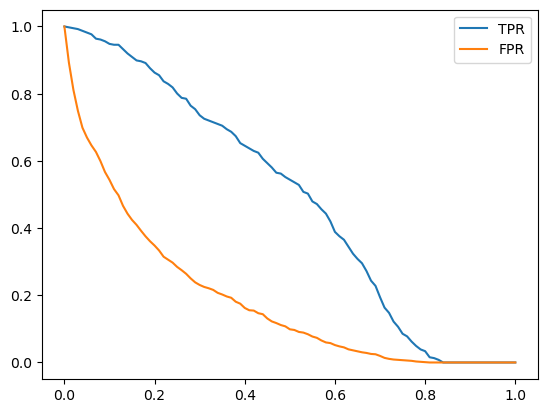

In [82]:
plt.plot(df_scores['threshold'], df_scores['tpr'], label='TPR')
plt.plot(df_scores['threshold'], df_scores['fpr'], label='FPR')
plt.legend()

## Random Model 

In [83]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [84]:
((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

In [85]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []
    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred <  t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))
    
    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

In [86]:
df_random = tpr_fpr_dataframe(y_val, y_rand)

In [87]:
df_random[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,39,100,0.898964,0.902248
20,0.2,307,822,79,201,0.795337,0.803519
30,0.3,276,724,110,299,0.715026,0.707722
40,0.4,237,624,149,399,0.613990,0.609971
50,0.5,202,518,184,505,0.523316,0.506354
60,0.6,161,409,225,614,0.417098,0.399804
70,0.7,121,302,265,721,0.313472,0.295210
80,0.8,78,206,308,817,0.202073,0.201369
90,0.9,40,101,346,922,0.103627,0.098729


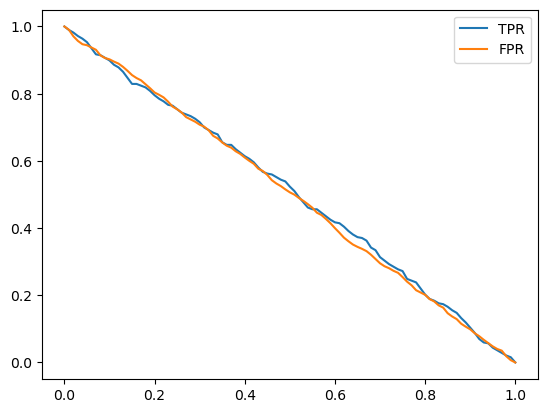

In [88]:
plt.plot(df_random['threshold'], df_random['tpr'], label='TPR')
plt.plot(df_random['threshold'], df_random['fpr'], label='FPR')
plt.legend()

## Ideal Model

In [89]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(1023, 386)

In [90]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [91]:
y_ideal_pred = np.linspace(0, 1, len(y_val))

In [92]:
1 - y_val.mean()

0.7260468417317246

In [93]:
((y_ideal_pred >= 0.726) == y_ideal).mean()

1.0

In [94]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

In [95]:
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,386,882,0,141,1.000000,0.862170
20,0.2,386,741,0,282,1.000000,0.724340
30,0.3,386,600,0,423,1.000000,0.586510
40,0.4,386,459,0,564,1.000000,0.448680
50,0.5,386,319,0,704,1.000000,0.311828
60,0.6,386,178,0,845,1.000000,0.173998
70,0.7,386,37,0,986,1.000000,0.036168
80,0.8,282,0,104,1023,0.730570,0.000000
90,0.9,141,0,245,1023,0.365285,0.000000


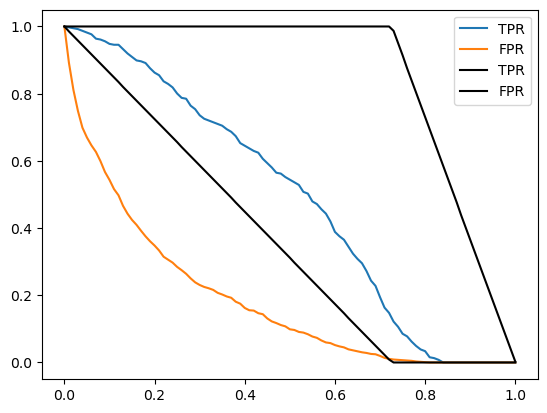

In [96]:
plt.plot(df_scores['threshold'], df_scores['tpr'], label='TPR')
plt.plot(df_scores['threshold'], df_scores['fpr'], label='FPR')

# plt.plot(df_random['threshold'], df_random['tpr'], label='TPR')
# plt.plot(df_random['threshold'], df_random['fpr'], label='FPR')

plt.plot(df_ideal['threshold'], df_ideal['tpr'], label='TPR', color='black')
plt.plot(df_ideal['threshold'], df_ideal['fpr'], label='FPR',  color='black')

plt.legend()

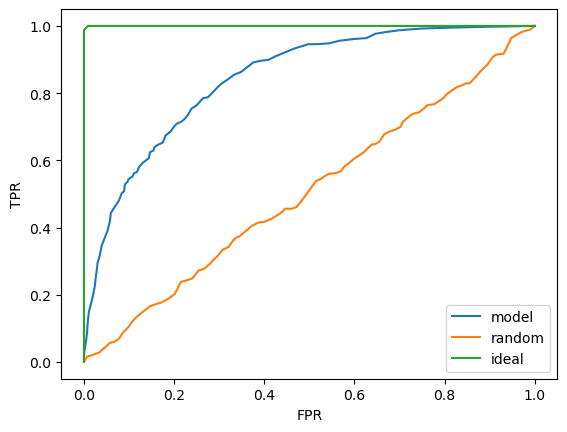

In [97]:
plt.plot(df_scores['fpr'], df_scores['tpr'], label='model')
plt.plot(df_random['fpr'], df_random['tpr'], label='random')
plt.plot(df_ideal['fpr'], df_ideal['tpr'], label='ideal')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [98]:
from sklearn.metrics import roc_curve

In [99]:
fpr, tpr, threshold = roc_curve(y_val, y_pred)

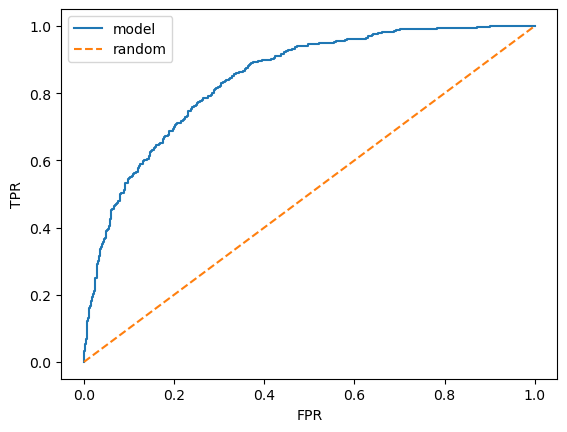

In [100]:
plt.plot(fpr, tpr, label='model')
plt.plot([0, 1], [0, 1], label='random', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

## ROC AUC

It computes the area under the curve.

In [101]:
from sklearn.metrics import auc

In [102]:
auc(fpr, tpr)

0.8438175841652359

In [103]:
auc(df_scores['fpr'], df_scores['tpr'])

0.8438657002922422

In [104]:
auc(df_ideal['fpr'], df_ideal['tpr'])

0.9999430203759136

In [105]:
fpr, tpr, threshold = roc_curve(y_val, y_pred)
auc(fpr, tpr)

0.8438175841652359

We can use another metrics.

In [106]:
from sklearn.metrics import roc_auc_score

In [107]:
roc_auc_score(y_val, y_pred)

0.8438175841652359

AUC tells us what is the probability that a randomly selected positive example has a score that is higher than randomly selected negative example.

In [108]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [109]:
import random

In [110]:
n = 100000
success = 0

for i in range(n):
    pos_ind = random.randint(0, len(pos) - 1)
    neg_ind = random.randint(0, len(neg) - 1)

    if pos[pos_ind] > neg[neg_ind]:
        success += 1
        
success / n

0.84397

In [111]:
n = 10000

np.random.seed(1)
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

(pos[pos_ind] > neg[neg_ind]).mean()

0.8412

# Cross Validation

In [134]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [135]:
dv, model = train(df_train, y_train, C=0.001)

In [114]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(dicts)
    
    y_pred = model.predict_proba(X)[:, 1]
    
    return y_pred

In [115]:
y_pred = predict(df_val, dv, model)

In [116]:
from sklearn.model_selection import KFold

In [117]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [118]:
train_idx, val_idx = next(kfold.split(df_full_train))

In [119]:
len(train_idx), len(val_idx)

(5070, 564)

In [120]:
len(df_full_train)

5634

In [121]:
df_full_train.iloc[train_idx]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
5,4765-oxppd,female,0,yes,yes,9,yes,no,dsl,yes,...,yes,yes,no,no,month-to-month,no,mailed_check,65.00,663.05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5628,2250-ivbwa,male,0,yes,yes,64,yes,no,fiber_optic,yes,...,no,no,no,no,month-to-month,no,electronic_check,81.05,5135.35,0
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [122]:
df_train = df_full_train.iloc[train_idx]
df_val = df_full_train.iloc[val_idx]

In [124]:
from tqdm.auto import tqdm

In [140]:
n_split = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):

        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print(f'{C} => {np.mean(scores):.3f} +- {np.std(scores):.3f}')

  0%|          | 0/7 [00:00<?, ?it/s]

0.001 => 0.826 +- 0.012
0.01 => 0.841 +- 0.012
0.1 => 0.841 +- 0.011
0.5 => 0.842 +- 0.011
1 => 0.840 +- 0.013
5 => 0.841 +- 0.012
10 => 0.841 +- 0.012


# Final Model

In [142]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8572386167896259